In [1]:
%run A_load-images.ipynb

684=


In [2]:
verb = do_verb()

In [3]:
if verb: fnames = ttl.glob()

Equalization of images with respect to a reference image, using the code from https://github.com/scikit-image/scikit-image/blob/master/skimage/exposure/histogram_matching.py#L22-L70 and testing if one could apply a mask :

In [4]:
import numpy as np

from skimage.exposure import match_histograms

def histMatch(sourceImage, templateImage, sigma=.61803):
    """
    Matches the histogram of sourceImage to the templateImage in order to fix lightness/exposure
    of the sourceImage.
    """
    mask = get_mask(sourceImage, sigma=sigma)
    N_X, N_Y, three = sourceImage.shape
    x, y, c = np.mgrid[-1:1:1j*N_X, -1:1:1j*N_Y, -1:1:1j*three]
    mask = np.exp(-.5* x**2 + y**2 / sigma**2)

    image_matched = match_histograms(sourceImage*mask, templateImage*mask, multichannel=True)

    return image_matched/mask

In [5]:
fname_reference = '../orchid/2021-02-14.22:10:07.jpg'
image_reference = ttl.process(fname_reference)

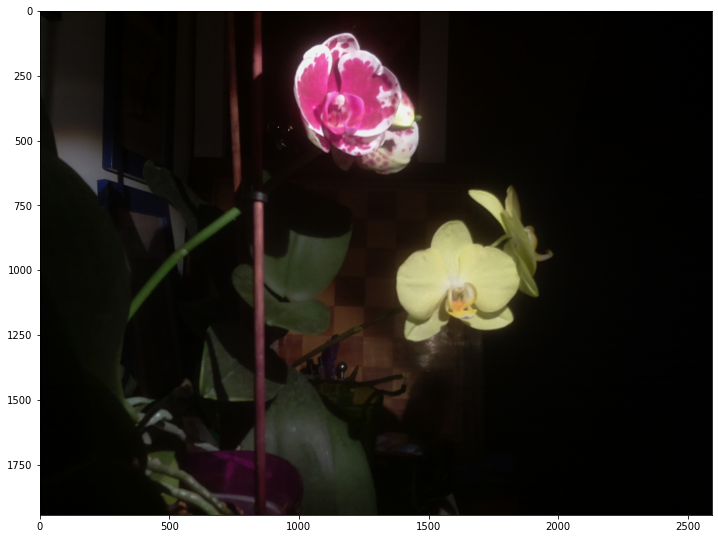

In [6]:
if verb:
    fig, ax = plt.subplots(figsize=ttl.figsize)
    ax.imshow(image_reference, vmin=0, vmax=255);

0.12992260830505942


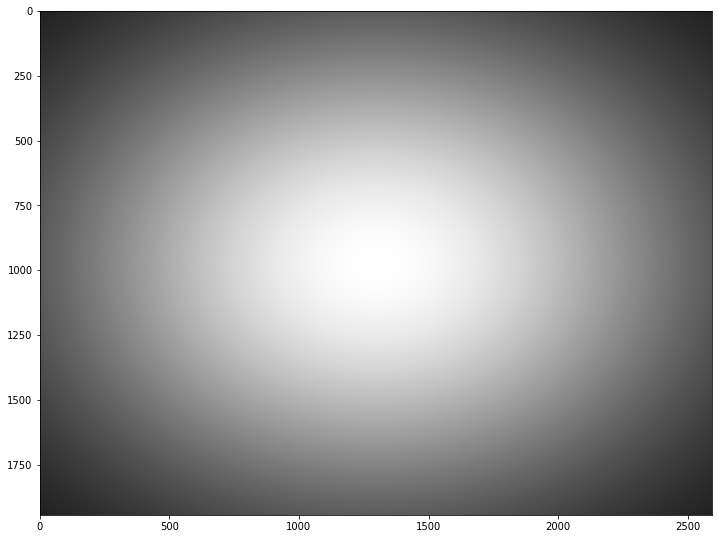

In [7]:
if verb:
    sigma = .7
    mask = get_mask(image_reference, sigma=sigma)
    N_X, N_Y, three = image_reference.shape
    x, y, c = np.mgrid[-1:1:1j*N_X, -1:1:1j*N_Y, -1:1:1j*three]
    mask = np.exp(-.5 * (x**2 + y**2) / sigma**2)
    
    fig, ax = plt.subplots(figsize=ttl.figsize)
    ax.imshow(mask, vmin=0, vmax=1);
    print(mask.min())

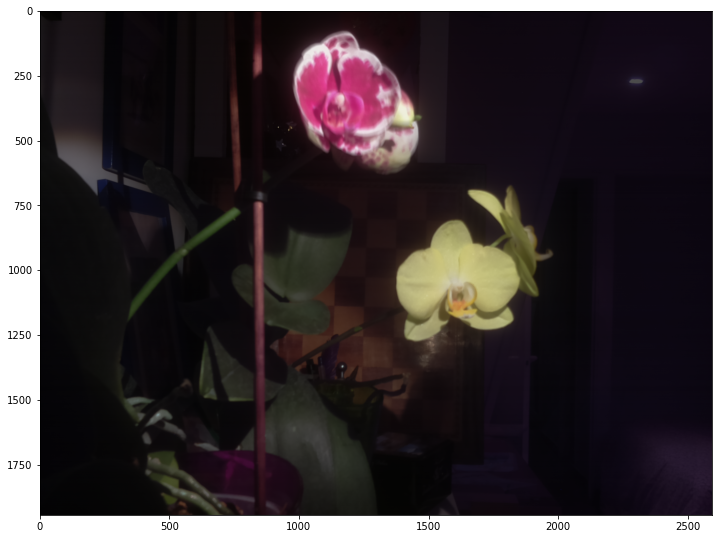

0.0020988677161005243 0.9690140845070422


In [8]:
count = 1
for fname in fnames:
    if '2021-02-14' in fname:
        image_reference += ttl.process(fname)
        count += 1
image_reference /= count
if verb:
    fig, ax = plt.subplots(figsize=ttl.figsize)
    ax.imshow(image_reference)
    plt.show();
    print(image_reference.min(), image_reference.max())

In [9]:
if verb: print(image_reference[0, 0])

[0.02640155 0.02314278 0.01220657]


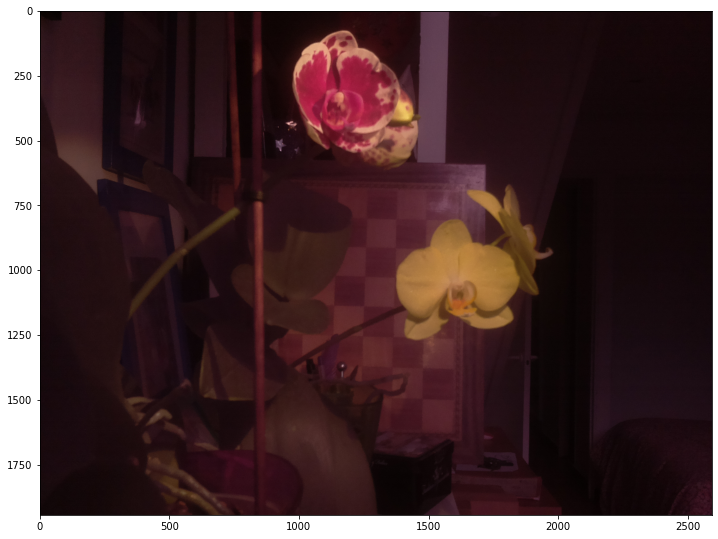

In [10]:
if verb:
    fname_new = '../orchid/2021-02-14.17:30:07.jpg'
    fig, ax = plt.subplots(figsize=ttl.figsize)
    ax.imshow(ttl.process(fname_new));

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0.0006728663365698633 1.0752185168953377


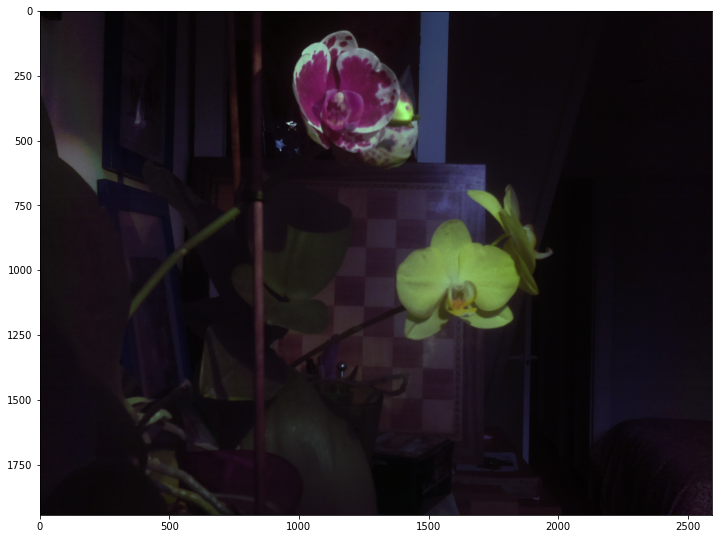

In [11]:
if verb:
    image_matched = histMatch(ttl.process(fname_new), image_reference)
    fig, ax = plt.subplots(figsize=ttl.figsize)
    ax.imshow(image_matched);

    print(image_matched.min(), image_matched.max())